In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Working With Time Series Data Exercises

## SF Temps

In [2]:
from vega_datasets import data
sf_temps = data.sf_temps()

In [3]:
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
sf_temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
sf_temps = sf_temps.set_index('date').sort_index()

In [6]:
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


### 1

Resample by the day and take the average temperature. Visualize the average temperature over time.

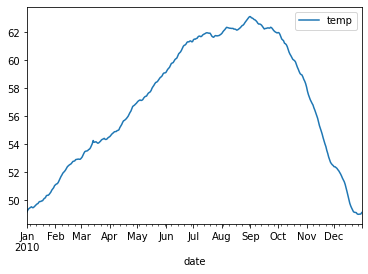

In [7]:
sf_temps.resample('D').mean().plot();

### 2

Write the code necessary to visualize the minimum temperature over time.

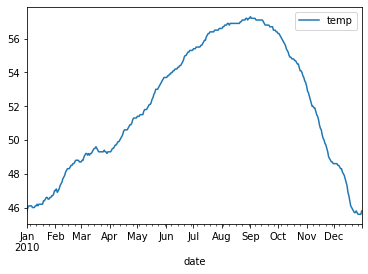

In [8]:
sf_temps.resample('D').min().plot();

### 3

Write the code necessary to visualize the maximum temperature over time.

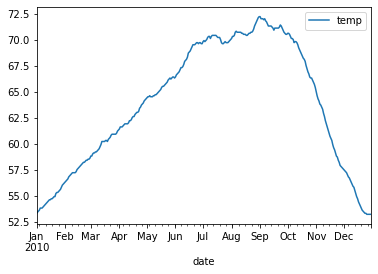

In [9]:
sf_temps.resample('D').max().plot();

### 4

Which month is the coldest, on average?

In [10]:
sf_temps.resample('M').mean().sort_values(by = 'temp').head(1).index.month_name()[0]

'January'

### 5

Which month has the highest average temperature?

In [11]:
sf_temps.resample('M').mean().sort_values(by = 'temp', ascending = False).head(1).index.month_name()[0]

'September'

### 6

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
min_max_df = sf_temps.resample('D').agg(['min', 'max'])
min_max_df['diff'] = min_max_df['temp']['max'] - min_max_df['temp']['min']
min_max_df.resample('M').max().sort_values(by = 'diff', ascending = False).head(1).index.month_name()[0]

'August'

### 7, Bonus

Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

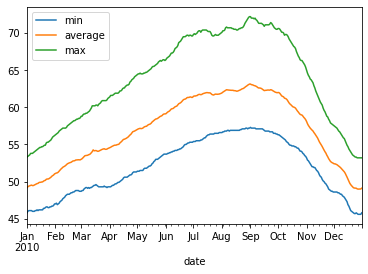

In [13]:
sf_temps.resample('D').min().temp.plot(label = 'min')
sf_temps.resample('D').mean().temp.plot(label = 'average')
sf_temps.resample('D').max().temp.plot(label = 'max')
plt.legend();

## Seattle Weather

In [14]:
seattle_weather = data.seattle_weather()

In [15]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [16]:
seattle_weather = seattle_weather.set_index('date')

In [17]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


### 1

Which year and month combination has the highest amount of precipitation?

In [18]:
seattle_weather.resample('M').sum().sort_values(by = 'precipitation', ascending = False).head(1).index.strftime('%Y-%B')[0]

'2015-December'

### 2

Visualize the amount of monthly precipitation over time.

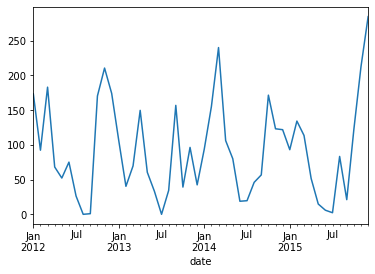

In [19]:
seattle_weather.resample('M').sum().precipitation.plot();

### 3

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

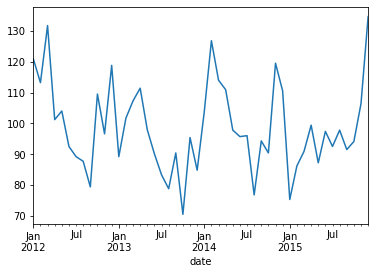

In [20]:
seattle_weather.resample('M').sum().wind.plot();

### 4

Which year-month combination is the windiest?

In [21]:
seattle_weather.resample('M').sum().sort_values(by = 'wind', ascending = False).head(1).index.strftime('%Y-%B')[0]

'2015-December'

### 5

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [22]:
sunny_day = seattle_weather.weather == 'sun'
seattle_weather[sunny_day].resample('Y').count().sort_values(by = 'weather', ascending = False).head(1).index.year[0]

2014

### 6

In which month does it rain the most?

In [23]:
seattle_weather['month'] = seattle_weather.index.month_name()
seattle_weather.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January
2012-01-02,10.9,10.6,2.8,4.5,rain,January
2012-01-03,0.8,11.7,7.2,2.3,rain,January
2012-01-04,20.3,12.2,5.6,4.7,rain,January
2012-01-05,1.3,8.9,2.8,6.1,rain,January


In [24]:
rainy_day = seattle_weather.weather == 'rain'
seattle_weather[rainy_day].groupby('month').count().sort_values(by = 'weather', ascending = False).head(1).index[0]

'February'

### 7

Which month has the most number of days with a non-zero amount of precipitation?

In [25]:
precipitating_day = seattle_weather.weather.isin({'rain', 'drizzle', 'snow'})
seattle_weather[precipitating_day].groupby('month').count().sort_values(by = 'weather', ascending = False).head(1).index[0]

'January'

## Flights 2k

In [39]:
flights = data.flights_20k()

In [40]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [41]:
flights = flights.set_index('date').sort_index()

In [42]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


### 1

Convert any negative delays to 0.

In [43]:
(flights.delay <= 0).sum()

10516

In [44]:
flights.delay = flights.apply(lambda row: row.delay if row.delay > 0 else 0, axis = 1)

In [45]:
flights.delay.value_counts()

0      10516
5        776
3        577
2        507
10       476
       ...  
509        1
178        1
245        1
222        1
196        1
Name: delay, Length: 194, dtype: int64

### 2

Which hour of the day has the highest average delay?

In [58]:
flights.groupby(by = flights.index.hour).mean().sort_values(by = 'delay', ascending = False).head(1)[['delay']]

,delay
date,
3,302.5


### 3

Does the day of the week make a difference in the delay amount?

In [62]:
flights.groupby(by = flights.index.day_name()).mean().sort_values(by = 'delay')

,delay,distance
date,,
Monday,7.165772,505.032215
Saturday,8.431498,550.889031
Tuesday,9.410866,496.021732
Sunday,10.413542,507.987758
Wednesday,11.032478,501.009094
Thursday,12.821322,485.175025
Friday,17.757596,501.118230


It does make a difference. On average Friday tends to have longer delay times and Monday has shorter delay times.

### 4

Does the month make a difference in the delay amount?

In [63]:
flights.groupby(by = flights.index.month_name()).mean().sort_values(by = 'delay')

,delay,distance
date,,
March,9.875287,504.712069
January,11.301592,500.391952
February,12.306106,511.156170


February has the longest delay times on average and March the shortest.

## Bonus, Iowa Electricity

In [65]:
iowa_electricity = data.iowa_electricity()

In [66]:
iowa_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [68]:
iowa_electricity = iowa_electricity.set_index('year')

In [69]:
iowa_electricity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2001-01-01 to 2017-01-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          51 non-null     object
 1   net_generation  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


### 1

For each row, calculate the percentage of the year's total that energy source provided.

In [90]:
yearly_totals = iowa_electricity.resample('Y', label = 'left').sum()
yearly_totals.index = yearly_totals.index + pd.DateOffset(1)
yearly_totals = yearly_totals.rename(columns = {'net_generation' : 'yearly_total'})

In [92]:
iowa_electricity = iowa_electricity.merge(yearly_totals, on = 'year')
iowa_electricity['percentage_yearly_total'] = round(iowa_electricity.net_generation / iowa_electricity.yearly_total, 2)
iowa_electricity

,source,net_generation,yearly_total,percentage_yearly_total
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.87
2001-01-01,Nuclear Energy,3853,40651,0.09
2001-01-01,Renewables,1437,40651,0.04
2002-01-01,Fossil Fuels,35991,42528,0.85
2002-01-01,Nuclear Energy,4574,42528,0.11
2002-01-01,Renewables,1963,42528,0.05
2003-01-01,Fossil Fuels,36234,42107,0.86
2003-01-01,Nuclear Energy,3988,42107,0.09
2003-01-01,Renewables,1885,42107,0.04


### 2

Lineplot of generation over time, color by source

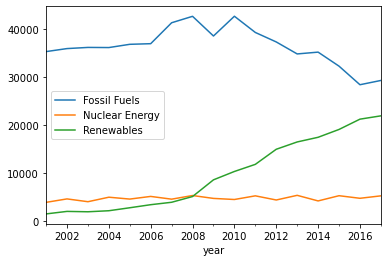

In [95]:
iowa_electricity[iowa_electricity.source == 'Fossil Fuels'].net_generation.plot(label = 'Fossil Fuels')
iowa_electricity[iowa_electricity.source == 'Nuclear Energy'].net_generation.plot(label = 'Nuclear Energy')
iowa_electricity[iowa_electricity.source == 'Renewables'].net_generation.plot(label = 'Renewables')
plt.legend();

### 3

Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [102]:
iowa_electricity.pivot_table(index = 'source', columns = iowa_electricity.index.year, values = 'net_generation')

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


### 4

Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

Same as number 2.

### 5

Is the total generation increasing over time?
- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total

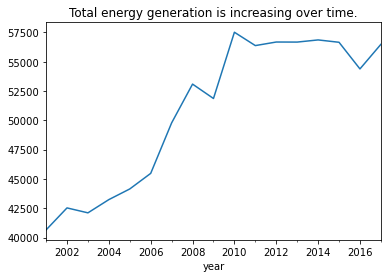

In [104]:
yearly_totals.yearly_total.plot()
plt.title('Total energy generation is increasing over time.');

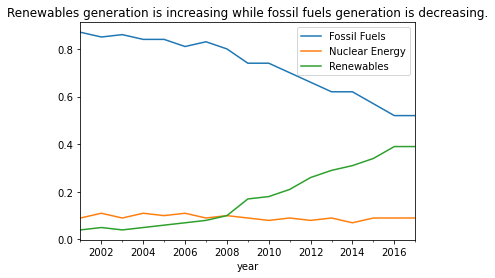

In [106]:
# We can see how each source contributes to the total generation by plotting each source in a separate line.
# Here we see the percentage of the total each source has contributed.

iowa_electricity[iowa_electricity.source == 'Fossil Fuels'].percentage_yearly_total.plot(label = 'Fossil Fuels')
iowa_electricity[iowa_electricity.source == 'Nuclear Energy'].percentage_yearly_total.plot(label = 'Nuclear Energy')
iowa_electricity[iowa_electricity.source == 'Renewables'].percentage_yearly_total.plot(label = 'Renewables')
plt.legend()
plt.title('Renewables generation is increasing while fossil fuels generation is decreasing.');